<a href="https://colab.research.google.com/github/singiresutagore/codingraja_rep/blob/main/movie_genre_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install SVM

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer

In [6]:
train_data=pd.read_csv("/content/train_data.txt", sep=":::",names=["TITLE","GENRE","DESCRIPTION"],nrows=5000,engine="python")
test_data=pd.read_csv("/content/test_data.txt", sep=":::",names=["ID","TITLE","DESCRIPTION"],nrows=5000,engine="python")


In [7]:
train_data.head

<bound method NDFrame.head of                                               TITLE       GENRE  \
1                     Oscar et la dame rose (2009)       drama    
2                                     Cupid (1997)    thriller    
3                 Young, Wild and Wonderful (1980)       adult    
4                            The Secret Sin (1915)       drama    
5                           The Unrecovered (2007)       drama    
...                                             ...         ...   
4996          The Twelve Dancing Princesses (????)     fantasy    
4997                      Una mujer decente (1950)       drama    
4998                            Cielo ciego (1998)       drama    
4999   43rd Annual Pig Bowl/Guns & Hoses XV (2017)       sport    
5000                           Laugh It Off (1939)     musical    

                                            DESCRIPTION  
1      Listening in to a conversation between his do...  
2      A brother and sister with a past incestuou

In [8]:
test_data.head

<bound method NDFrame.head of         ID                              TITLE  \
0        1              Edgar's Lunch (1998)    
1        2          La guerra de papá (1977)    
2        3       Off the Beaten Track (2010)    
3        4            Meu Amigo Hindu (2015)    
4        5                 Er nu zhai (1955)    
...    ...                                ...   
4995  4996                       Klip (2012)    
4996  4997              The Runner (2016/VI)    
4997  4998                    Mysfits (2011)    
4998  4999   Filmregény - Három növér (1978)    
4999  5000                  Uebergeil (2016)    

                                            DESCRIPTION  
0      L.R. Brane loves his life - his car, his apar...  
1      Spain, March 1964: Quico is a very naughty ch...  
2      One year in the life of Albin and his family ...  
3      His father has died, he hasn't spoken with hi...  
4      Before he was known internationally as a mart...  
...                              

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   TITLE        5000 non-null   object
 1   GENRE        5000 non-null   object
 2   DESCRIPTION  5000 non-null   object
dtypes: object(3)
memory usage: 156.2+ KB


In [10]:
train_data.describe()

,TITLE,GENRE,DESCRIPTION
count,5000,5000,5000
unique,5000,27,4998
top,Oscar et la dame rose (2009),drama,"Olga, Masha, and Irina Prozoroff lead lonely ..."
freq,1,1252,2


In [11]:
test_data.info()
test_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           5000 non-null   int64 
 1   TITLE        5000 non-null   object
 2   DESCRIPTION  5000 non-null   object
dtypes: int64(1), object(2)
memory usage: 117.3+ KB


,ID
count,5000.000000
mean,2500.500000
std,1443.520003
min,1.000000
25%,1250.750000
50%,2500.500000
75%,3750.250000
max,5000.000000


In [12]:
train_data.isnull().sum()
test_data.isnull().sum()


ID             0
TITLE          0
DESCRIPTION    0
dtype: int64

<ipython-input-13-6ee3ad1b0108>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, y='GENRE', order=train_data['GENRE'].value_counts().index, palette='viridis')
<ipython-input-13-6ee3ad1b0108>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts, palette='viridis')


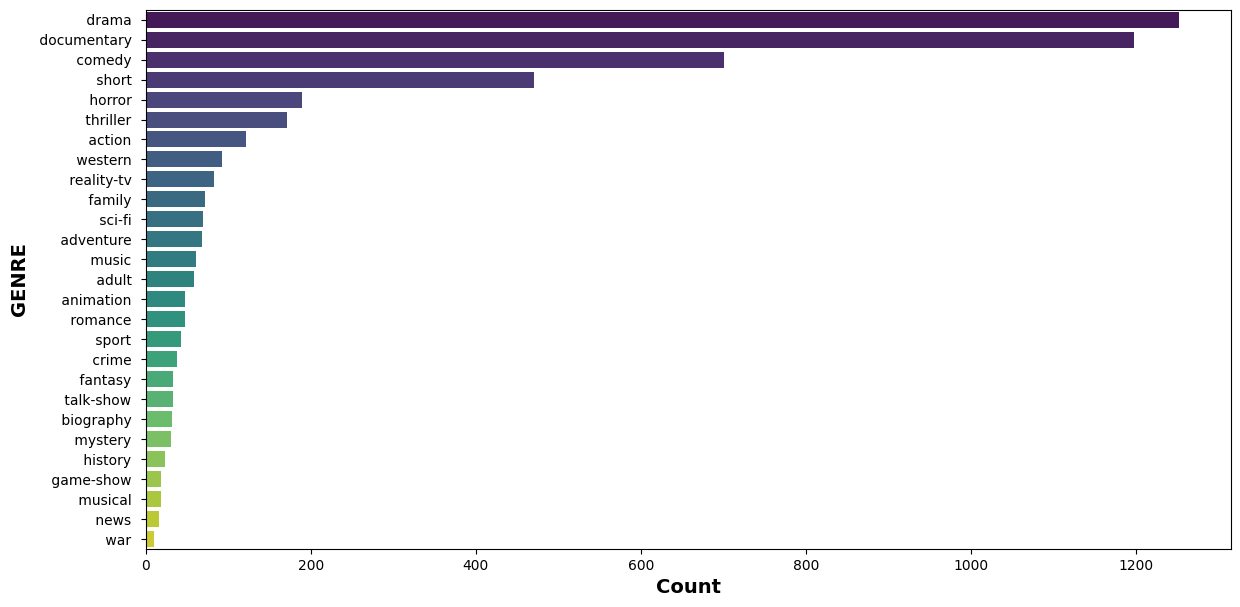

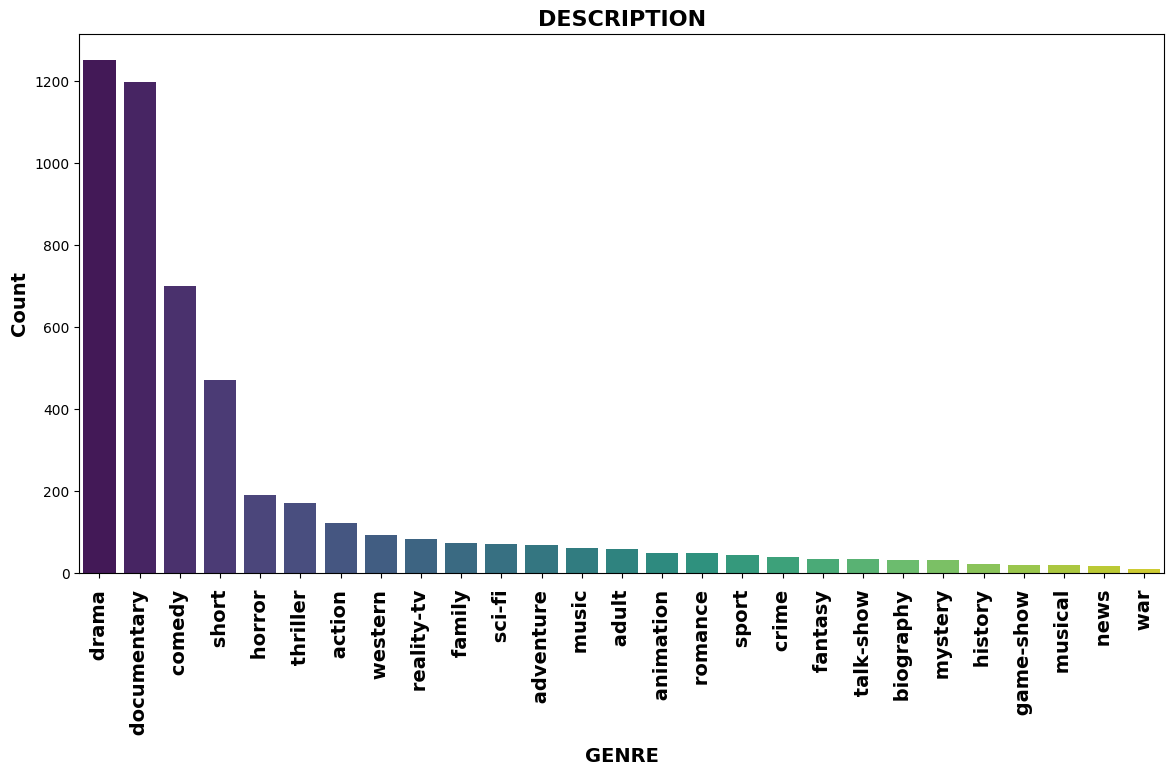

In [13]:
plt.figure(figsize=(14, 7))
sns.countplot(data=train_data, y='GENRE', order=train_data['GENRE'].value_counts().index, palette='viridis')
plt.xlabel('Count', fontsize=14, fontweight='bold')
plt.ylabel('GENRE', fontsize=14, fontweight='bold')
plt.figure(figsize=(14, 7))
counts = train_data['GENRE'].value_counts()
sns.barplot(x=counts.index, y=counts, palette='viridis')
plt.xlabel('GENRE', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('DESCRIPTION', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold')
plt.show()

In [14]:
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))
def clean_text(text):
    text = text.lower()
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'pic.\S+', '', text)
    text = re.sub(r"[^a-zA-Z+']", ' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text + ' ')
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')
    text = " ".join([i for i in words if i not in stopwords and len(i) > 2])
    text = re.sub("\s[\s]+", " ", text).strip()
    return text

train_data['Text_cleaning'] = train_data['DESCRIPTION'].apply(clean_text)
test_data['Text_cleaning'] = test_data['DESCRIPTION'].apply(clean_text)

In [15]:
vectorize=TfidfVectorizer()
X_train = vectorize.fit_transform(train_data['Text_cleaning'])
X_test = vectorize.transform(test_data['Text_cleaning'])

In [16]:
X = X_train
y = train_data["GENRE"]
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [17]:
model = SVC(kernel='linear')
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [18]:
y_pred = model.predict(X_test)
y_pred

array([' comedy ', ' drama ', ' comedy ', ' drama ', ' drama ', ' drama ',
       ' documentary ', ' documentary ', ' drama ', ' drama ',
       ' documentary ', ' comedy ', ' drama ', ' documentary ',
       ' comedy ', ' drama ', ' comedy ', ' drama ', ' drama ', ' drama ',
       ' documentary ', ' drama ', ' drama ', ' documentary ', ' drama ',
       ' drama ', ' drama ', ' documentary ', ' drama ', ' drama ',
       ' drama ', ' documentary ', ' comedy ', ' drama ', ' drama ',
       ' drama ', ' drama ', ' documentary ', ' documentary ', ' drama ',
       ' documentary ', ' documentary ', ' drama ', ' comedy ', ' drama ',
       ' short ', ' comedy ', ' documentary ', ' drama ', ' documentary ',
       ' drama ', ' drama ', ' drama ', ' drama ', ' documentary ',
       ' documentary ', ' drama ', ' drama ', ' drama ', ' documentary ',
       ' documentary ', ' drama ', ' drama ', ' documentary ', ' drama ',
       ' comedy ', ' drama ', ' documentary ', ' documentary ',
       '

In [19]:
accuracy = accuracy_score(Y_test, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.522
